# ⚡️study by 석민⚡️

# forecast(시계열 분석)

In [ ]:
!pip install prophet
!pip install pandas-datareader

In [3]:
from prophet import Prophet
from pandas_datareader import data

# 함수 기초

In [4]:
# 전역변수(global)
a = 1

def edit_a(i):
    # 지역변수(local)
    global a
    a = i

In [5]:
edit_a(2)
print(a)

2


In [ ]:
# 함수 괄호안에 커서를 놓고 'shift + tab'을 누르면 그 함수에 대한 설명(Docstring)이 나온다
np.arange()
plotSinWave1()

# 1. 함수의 기초 이론 및 실습

### 삼각함수의 표준형

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

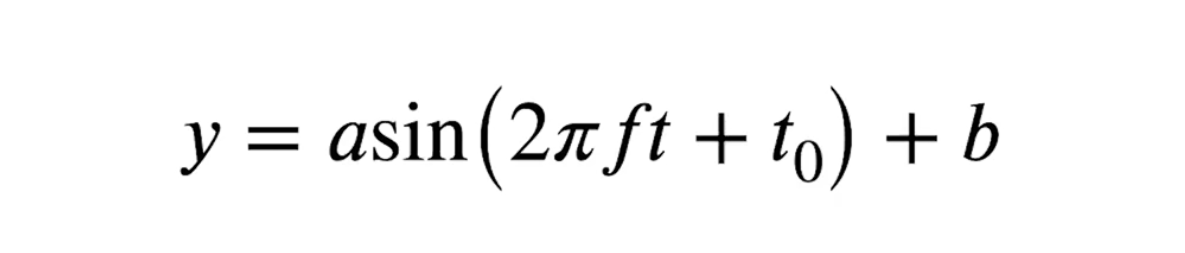

In [24]:
# sin 함수를 구성하기 위해 필요한 인자들을 def의 입력변수로 받는다.
def plotSinWave1(amp, freq, end_time, sample_time, start_time, bias):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(start_time, end_time, sample_time) + bias
    result = amp * np.sin(2 * np.pi * freq * time + start_time) + bias
    
    plt.figure(figsize = (12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(
    str(amp) + "*sin(2*pi*" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias))
    plt.show()

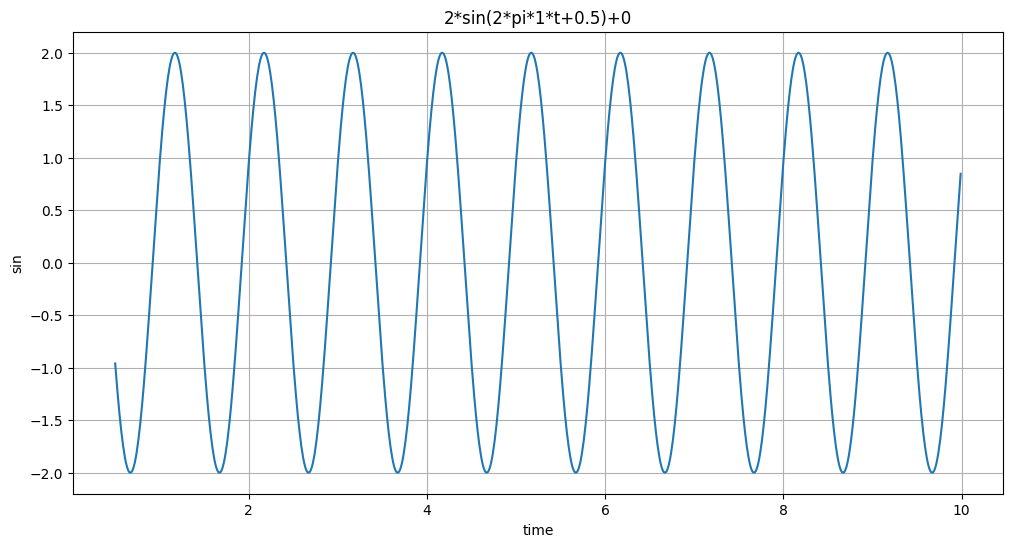

In [25]:
plotSinWave1(2, 1, 10, 0.01, 0.5, 0)

In [34]:
def plotSinWave2(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    end_time = kwargs.get("end_time", 1)
    sample_time = kwargs.get("sample_time", 0.01)
    amp = kwargs.get("amp", 1) # 사용자가 amp라는 변수명을 지정했다면 그것을 사용하고 아니면 1을 사용한다.
    freq = kwargs.get("freq", 1)
    start_time = kwargs.get("start_time", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(start_time, end_time, sample_time) + bias
    result = amp * np.sin(2 * np.pi * freq * time + start_time) + bias
    
    plt.figure(figsize = (12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(
    str(amp) + "*sin(2*pi*" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias))
    plt.show()

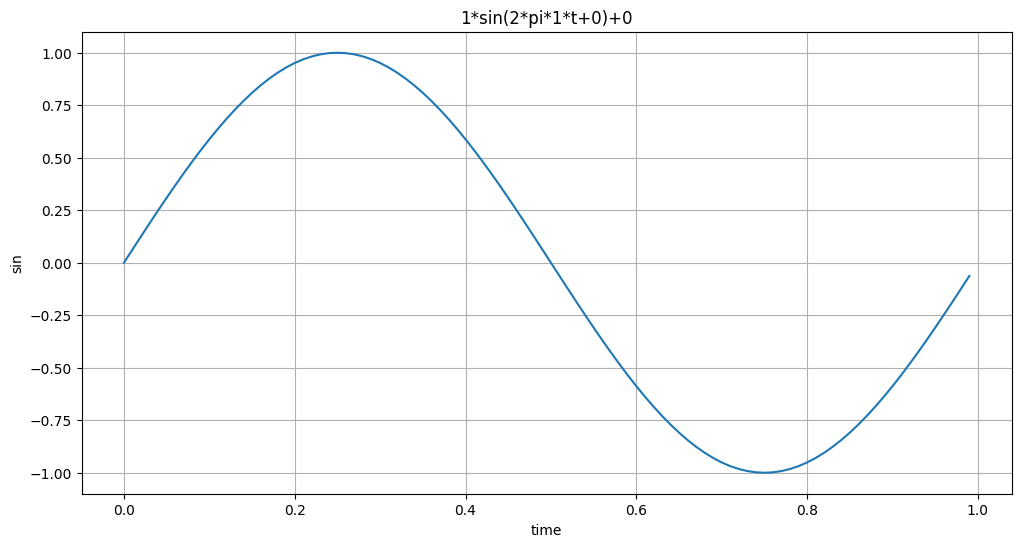

In [35]:
plotSinWave2()

# 2. 함수 import

"__" : 던던 -> 예약문
- 실행문
~~~python
if __name__ == "__main__":
~~~
- .py 파일 맨 아래에 코드를 작성해야 모듈을 불러왔을때 실행 가능.

In [52]:
%%writefile ./drawSinWave.py

import numpy as np
import matplotlib.pyplot as plt

def plotSinWave2(**kwargs):
    """
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    """
    end_time = kwargs.get("end_time", 1)
    sample_time = kwargs.get("sample_time", 0.01)
    amp = kwargs.get("amp", 1) # 사용자가 amp라는 변수명을 지정했다면 그것을 사용하고 아니면 1을 사용한다.
    freq = kwargs.get("freq", 1)
    start_time = kwargs.get("start_time", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(start_time, end_time, sample_time) + bias
    result = amp * np.sin(2 * np.pi * freq * time + start_time) + bias
    
    plt.figure(figsize = (12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title("한글테스트" +
    str(amp) + "*sin(2*pi*" + str(freq) + "*t+" + str(start_time) + ")+" + str(bias))
    plt.show()
    
if __name__ == "__main__":
    print("Hello world")
    print("This is test graph!!")
    plotSinWave2(emp = 1 , endTime = 2)

Overwriting ./drawSinWave.py


## iterm으로 실행 시

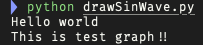

### 실행시 그래프 출력!!

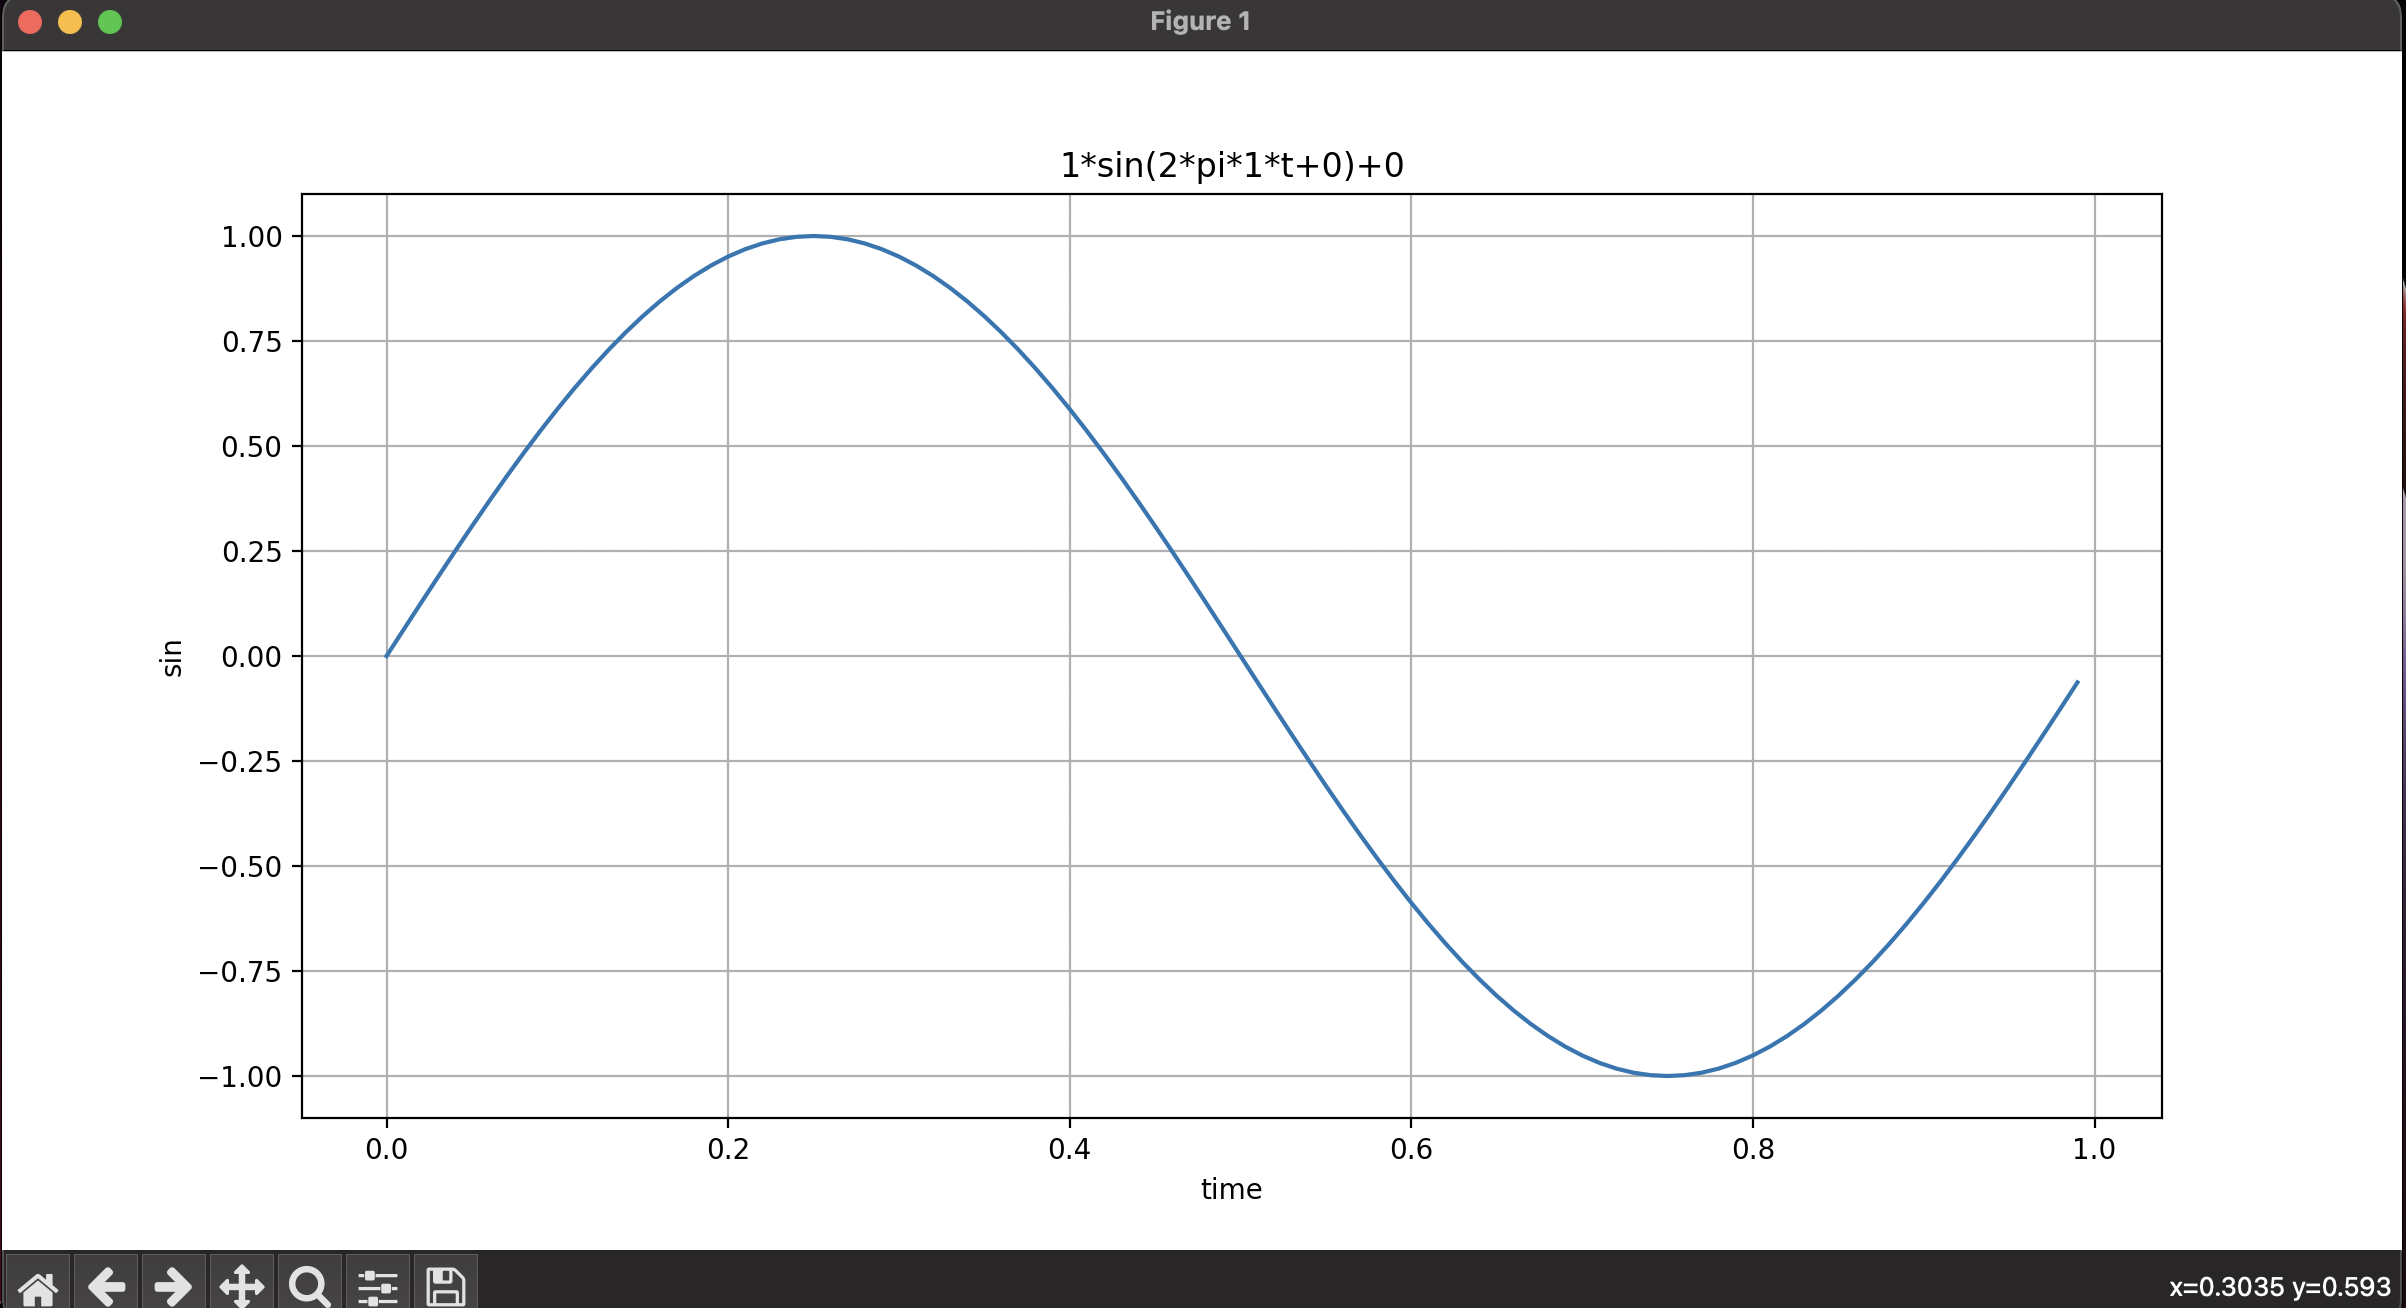

## 주피터 노트북으로 실행 시

In [53]:
import drawSinWave as ds

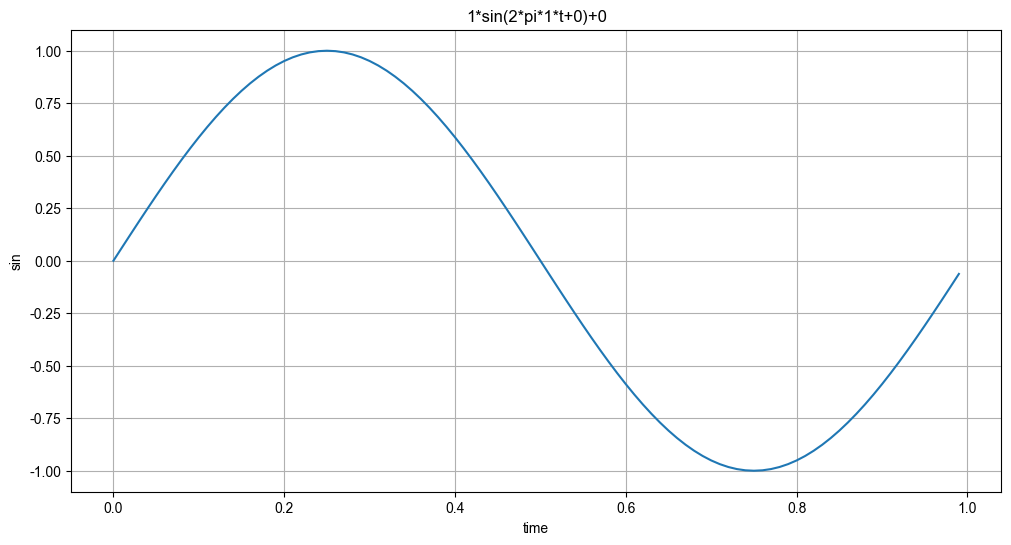

In [54]:
ds.plotSinWave2()

### 한글 폰트 적용하는 모듈 만들기

In [62]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangil OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False

Overwriting ./set_matplotlib_hangul.py


In [63]:
import set_matplotlib_hangul

Text(0.5, 1.0, '한글')

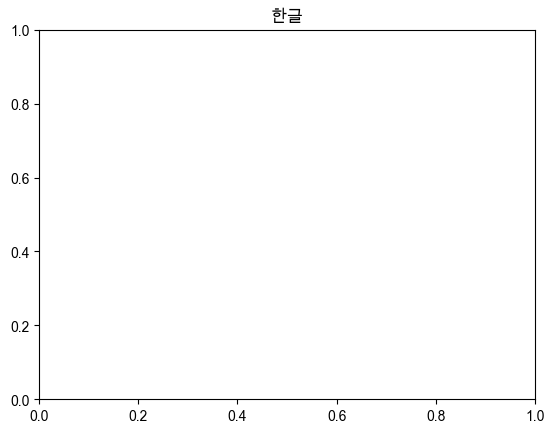

In [64]:
plt.title("한글")

# 3. prophet 기초

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({
    "ds": ds, 
    "y": result
})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


<Axes: >

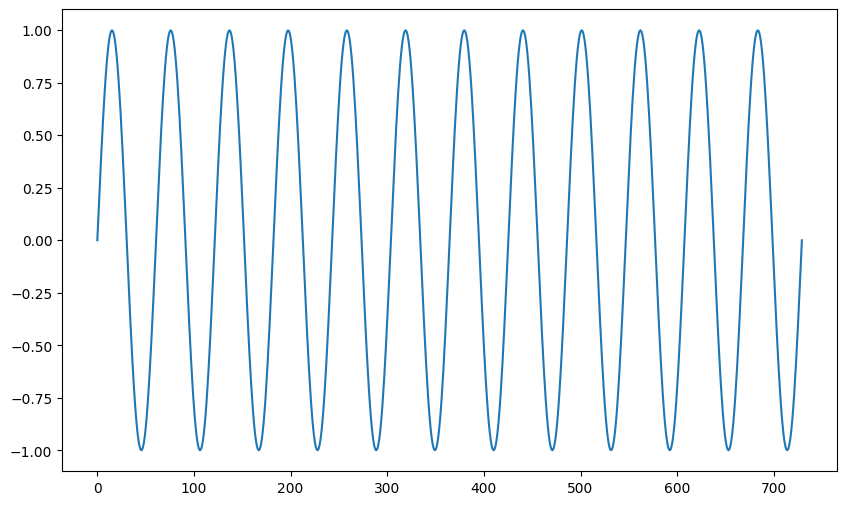

In [3]:
df["y"].plot(figsize=(10, 6))

In [10]:
from prophet import Prophet

m = Prophet(yearly_seasonality = True, daily_seasonality = True)
m.fit(df);

22:17:40 - cmdstanpy - INFO - Chain [1] start processing
22:17:40 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods = 30)
forecast = m.predict(future)

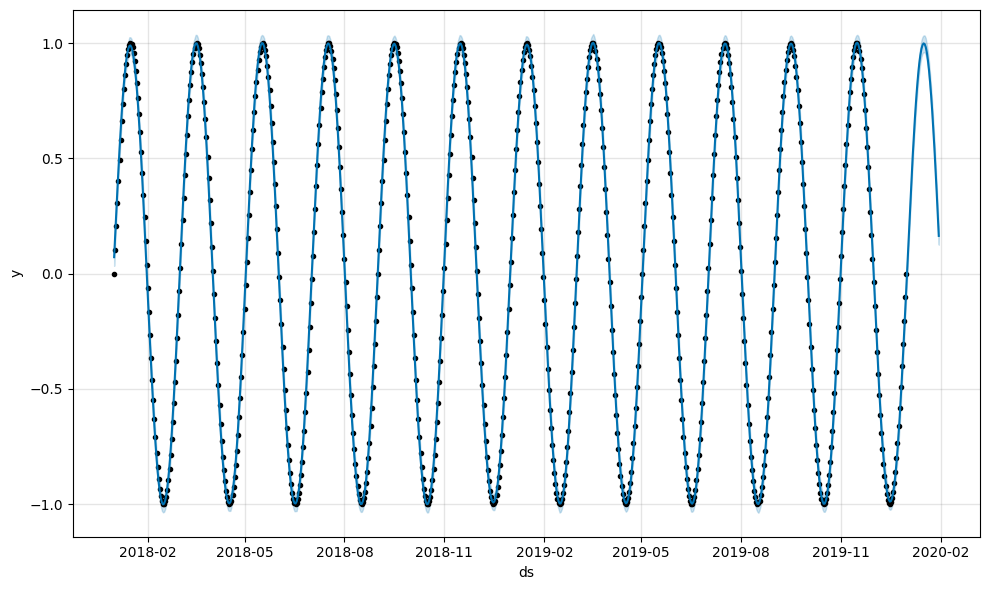

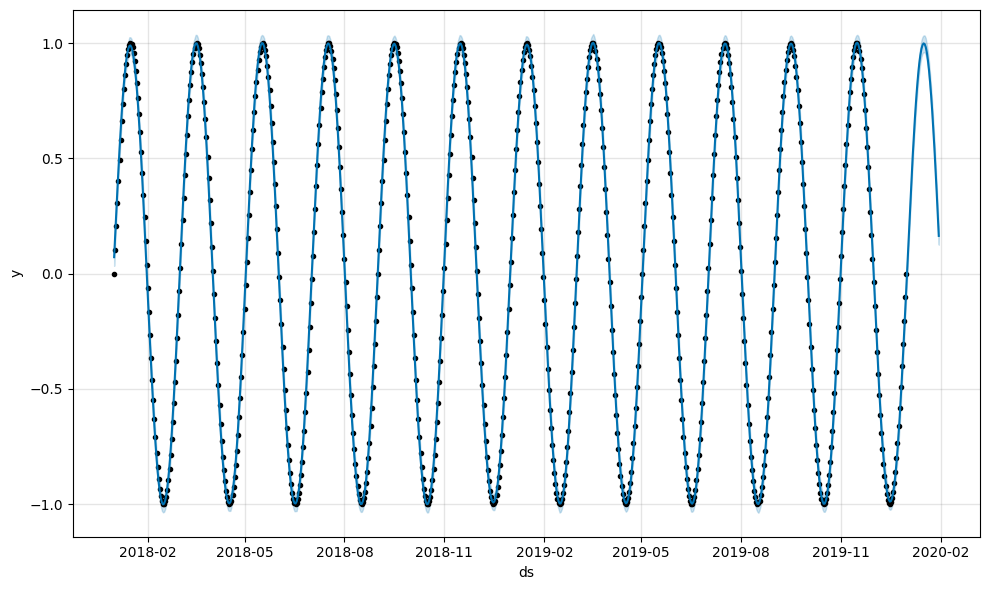

In [12]:
m.plot(forecast)

### 2번째 - result에 time 추가

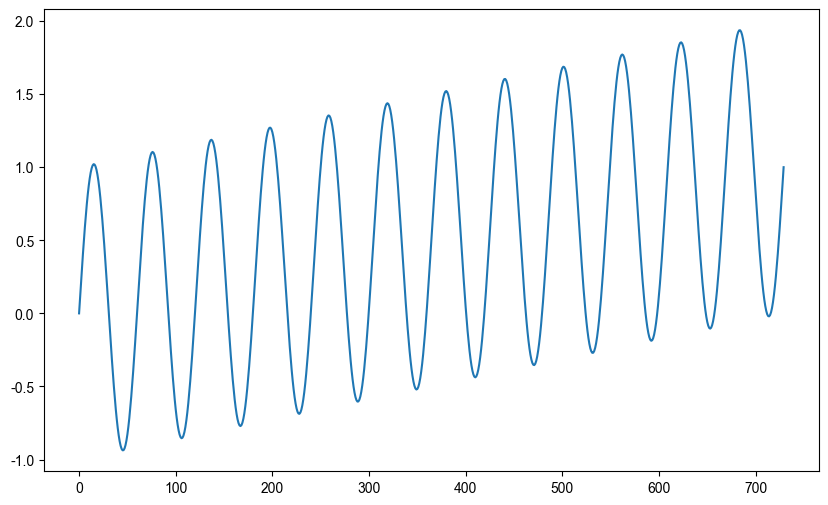

In [77]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({
    "ds": ds, 
    "y": result
})
df['y'].plot(figsize=(10, 6));

### 예측

22:04:01 - cmdstanpy - INFO - Chain [1] start processing
22:04:01 - cmdstanpy - INFO - Chain [1] done processing


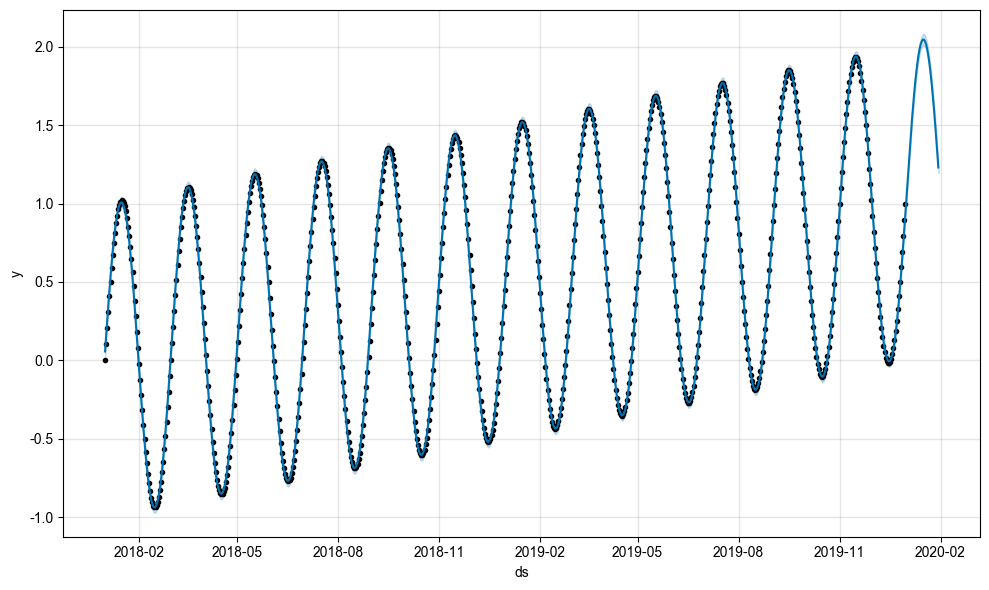

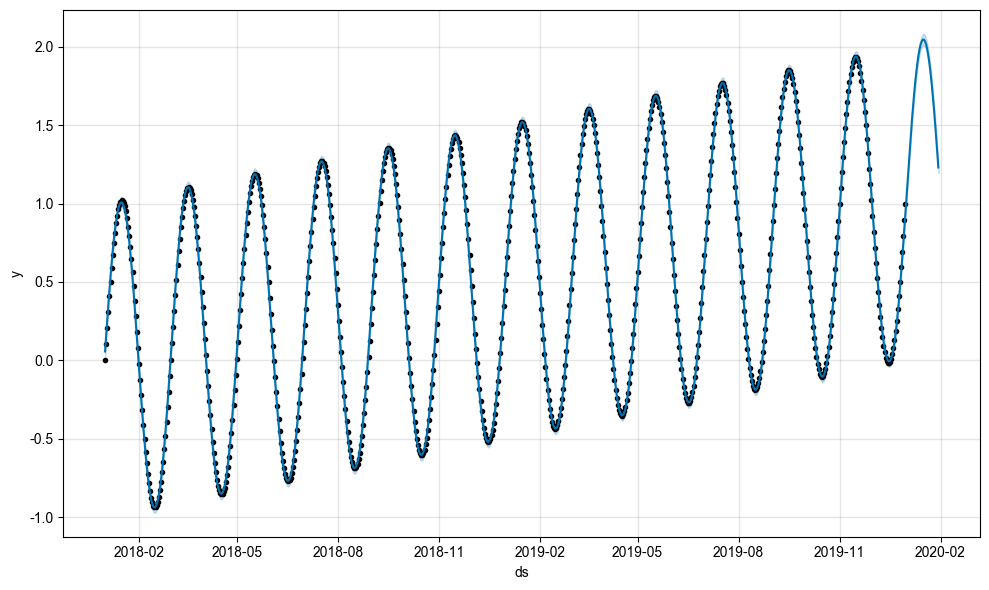

In [85]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

### 3번째 result에 random 오차 추가

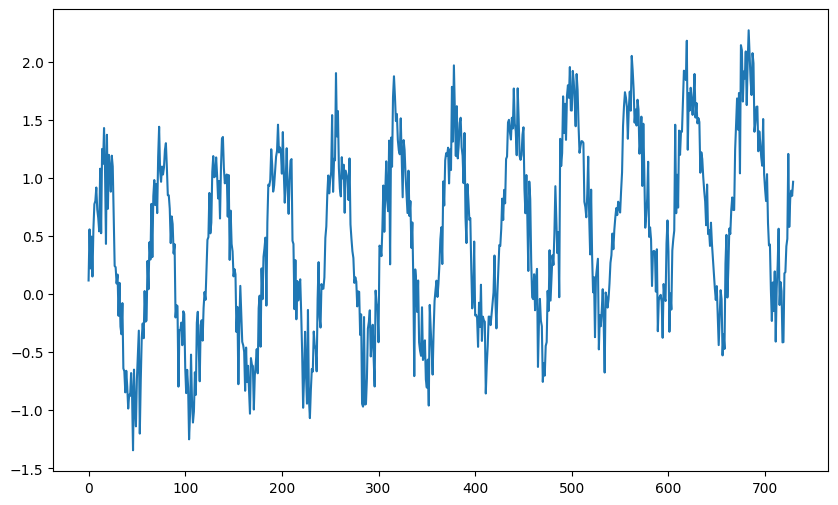

In [15]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4

ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({
    "ds": ds, 
    "y": result
})
df['y'].plot(figsize=(10, 6));

### 예측

22:37:08 - cmdstanpy - INFO - Chain [1] start processing
22:37:08 - cmdstanpy - INFO - Chain [1] done processing


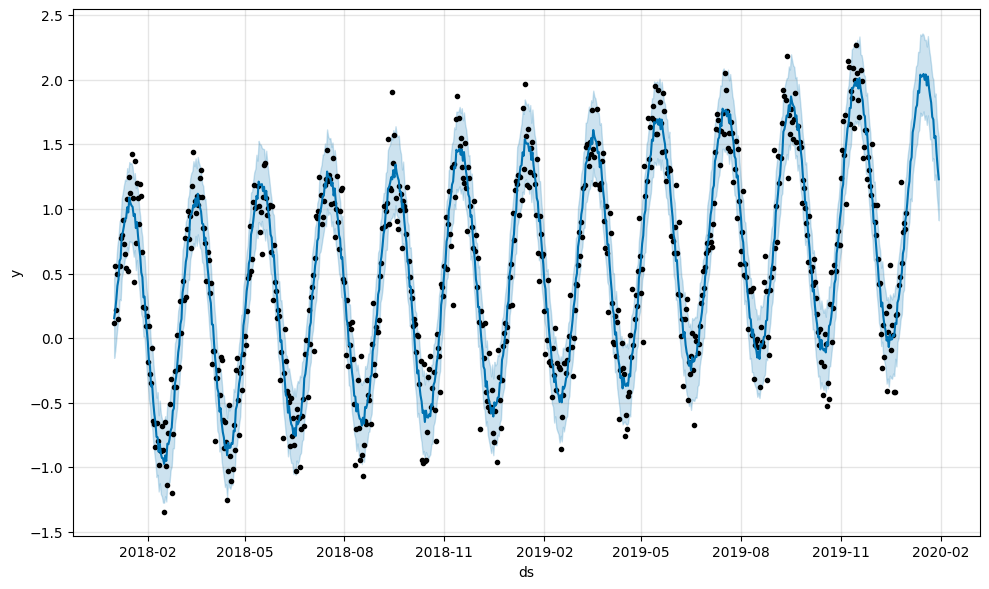

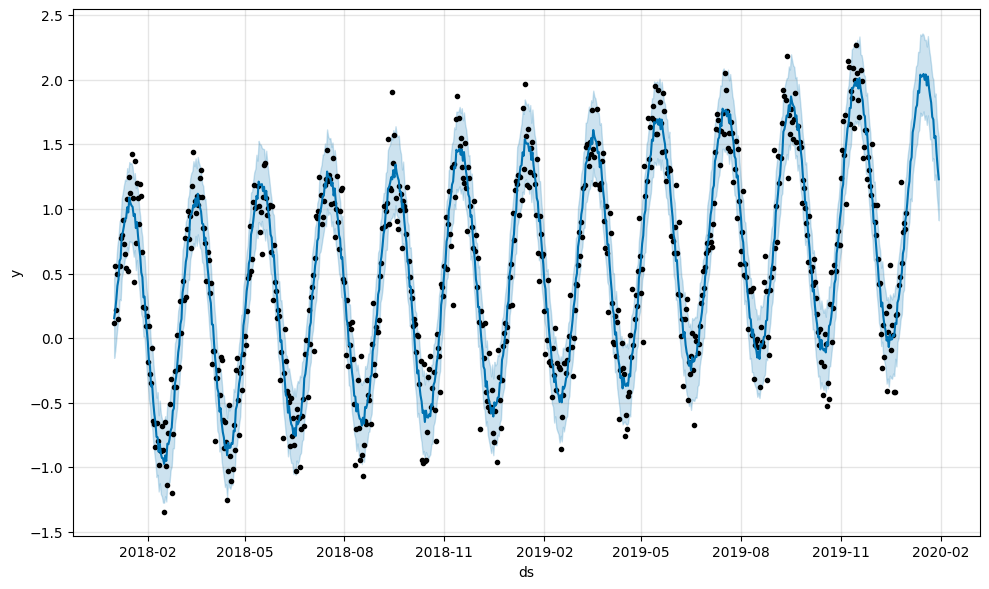

In [19]:
from prophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
m.plot(forecast)

# 4. 시계열 데이터(웹 유입량)
- https://pinkwink.kr/

In [20]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime

%matplotlib inline

In [23]:
pinkwink_web = pd.read_csv("./05_PinkWink_Web_Traffic.csv",
                         encoding="utf-8",
                         thousands=",",
                         names=["data", "hit"],
                         index_col=0)

In [26]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]

In [28]:
pinkwink_web.head()

,hit
data,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


<Axes: xlabel='data'>

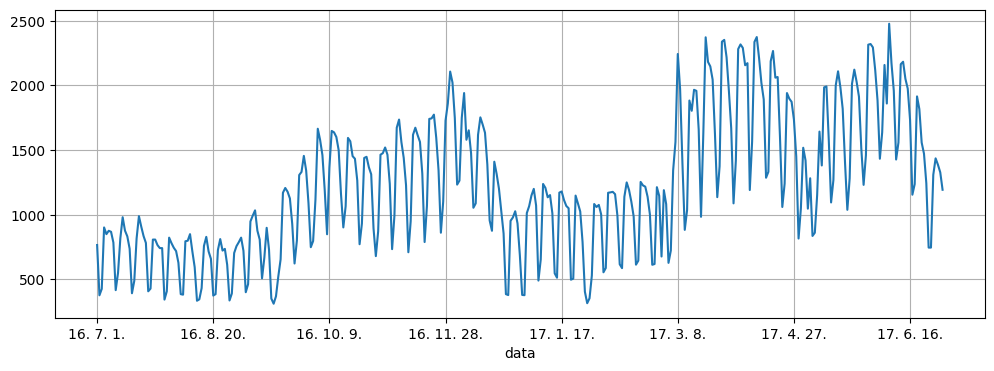

In [30]:
# 전테 데이터 그려보기
pinkwink_web["hit"].plot(figsize=(12, 4), grid=True)

In [35]:
# trend 분석을 시각화하기 위한 x축 값을 만들기
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web["hit"].values
fx = np.linspace(0, time[-1], 1000)

In [37]:
time[-1]

364

In [39]:
# 에러를 계산할 함수
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [41]:
f1p = np.polyfit(time, traffic, 1)
f1 = np.poly1d(f1p)
# poly1d([  2.94751137, 678.39950595])

f2p = np.polyfit(time, traffic, 2)
f2 = np.poly1d(f2p)

f3p = np.polyfit(time, traffic, 3)
f3 = np.poly1d(f3p)

f15p = np.polyfit(time, traffic, 15)
f15 = np.poly1d(f15p)

In [43]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.6284101894695
429.53280466762925
330.4777302323968


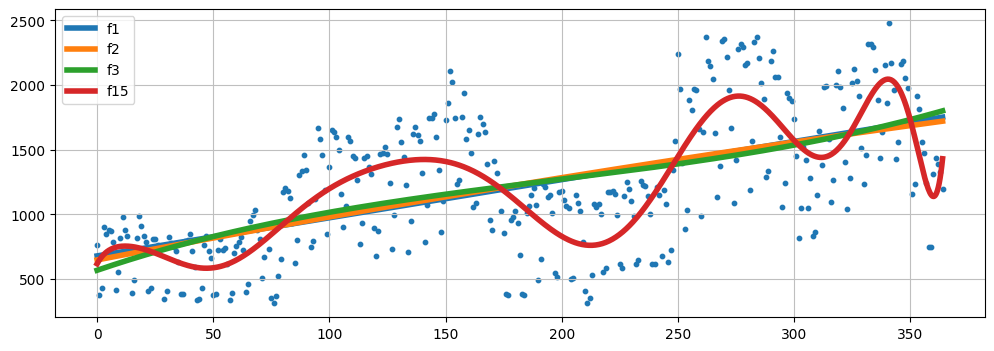

In [44]:
plt.figure(figsize=(12, 4))
plt.scatter(time, traffic, s=10)
plt.plot(fx, f1(fx), lw=4, label="f1")
plt.plot(fx, f2(fx), lw=4, label="f2")
plt.plot(fx, f3(fx), lw=4, label="f3")
plt.plot(fx, f15(fx), lw=4, label="f15")

plt.grid(True, linestyle="-", color="0.75")
plt.legend(loc=2)
plt.show()

In [51]:
df = pd.DataFrame({
    "ds": pinkwink_web.index,
    "y": pinkwink_web["hit"]
})

In [52]:
df

,ds,y
data,,
16. 7. 1.,16. 7. 1.,766.0
16. 7. 2.,16. 7. 2.,377.0
16. 7. 3.,16. 7. 3.,427.0
16. 7. 4.,16. 7. 4.,902.0
16. 7. 5.,16. 7. 5.,850.0
...,...,...
17. 6. 26.,17. 6. 26.,1309.0
17. 6. 27.,17. 6. 27.,1436.0
17. 6. 28.,17. 6. 28.,1387.0


In [53]:
df.reset_index(inplace=True)
df

,data,ds,y
0,16. 7. 1.,16. 7. 1.,766.0
1,16. 7. 2.,16. 7. 2.,377.0
2,16. 7. 3.,16. 7. 3.,427.0
3,16. 7. 4.,16. 7. 4.,902.0
4,16. 7. 5.,16. 7. 5.,850.0
...,...,...,...
360,17. 6. 26.,17. 6. 26.,1309.0
361,17. 6. 27.,17. 6. 27.,1436.0
362,17. 6. 28.,17. 6. 28.,1387.0
363,17. 6. 29.,17. 6. 29.,1328.0


In [55]:
df["ds"] = pd.to_datetime(df["ds"], format="%y. %m. %d.")
df

,data,ds,y
0,16. 7. 1.,2016-07-01,766.0
1,16. 7. 2.,2016-07-02,377.0
2,16. 7. 3.,2016-07-03,427.0
3,16. 7. 4.,2016-07-04,902.0
4,16. 7. 5.,2016-07-05,850.0
...,...,...,...
360,17. 6. 26.,2017-06-26,1309.0
361,17. 6. 27.,2017-06-27,1436.0
362,17. 6. 28.,2017-06-28,1387.0
363,17. 6. 29.,2017-06-29,1328.0


In [57]:
del df["data"]

In [58]:
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [59]:
# 객체 정의 및 학습
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

# 60일에 해당하는 데이터 예측
future = m.make_future_dataframe(periods=60)

# 예측 결과는 상한/하한의 범위를 포함해서 얻어진다
forecast = m.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

23:12:17 - cmdstanpy - INFO - Chain [1] start processing
23:12:17 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,893.009482,679.088838,1100.249278
421,2017-08-26,477.798600,279.863890,669.384934
422,2017-08-27,610.556577,406.669565,817.581313
423,2017-08-28,1163.589492,971.119149,1369.557181
424,2017-08-29,1199.674958,988.999548,1402.573765


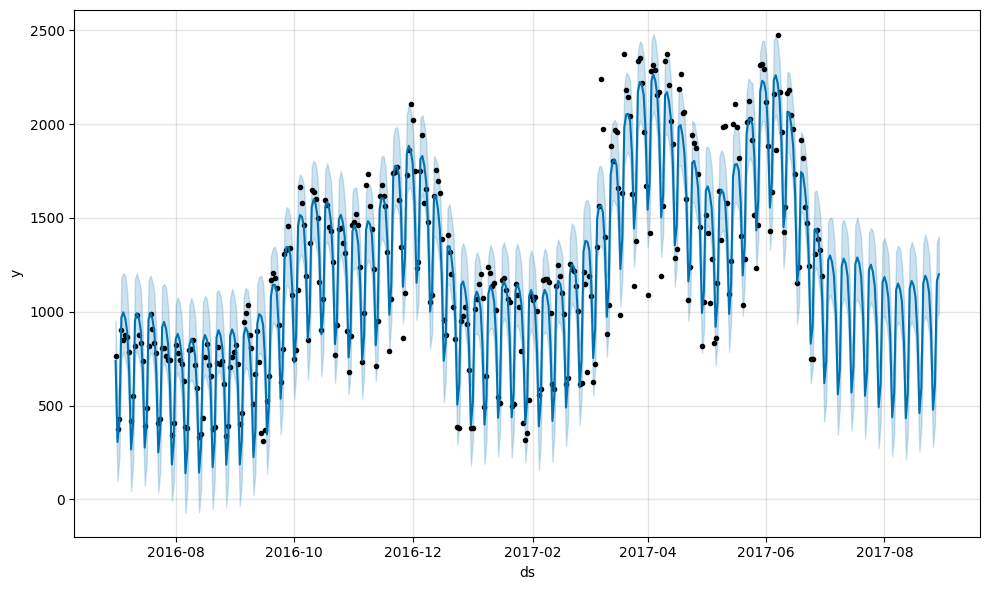

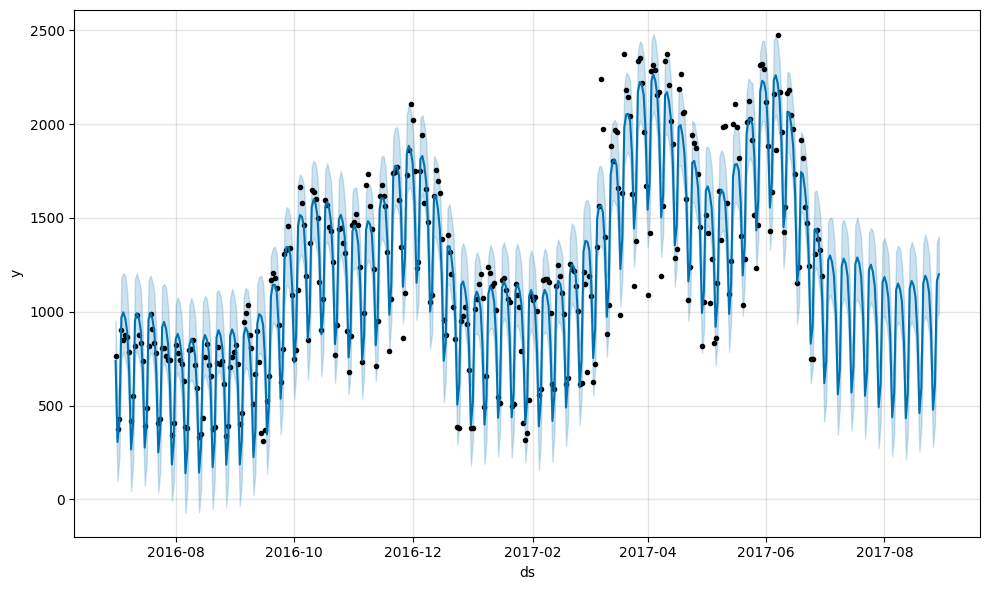

In [60]:
m.plot(forecast)

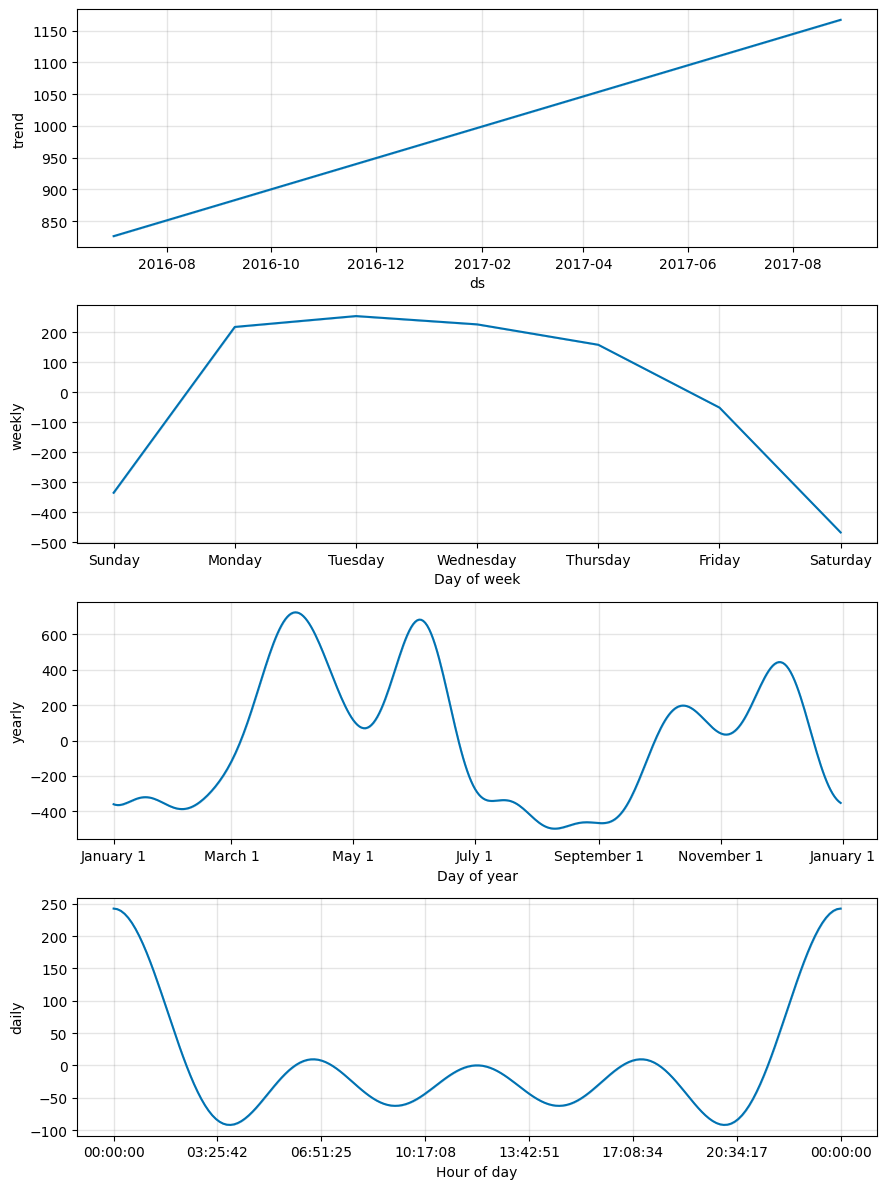

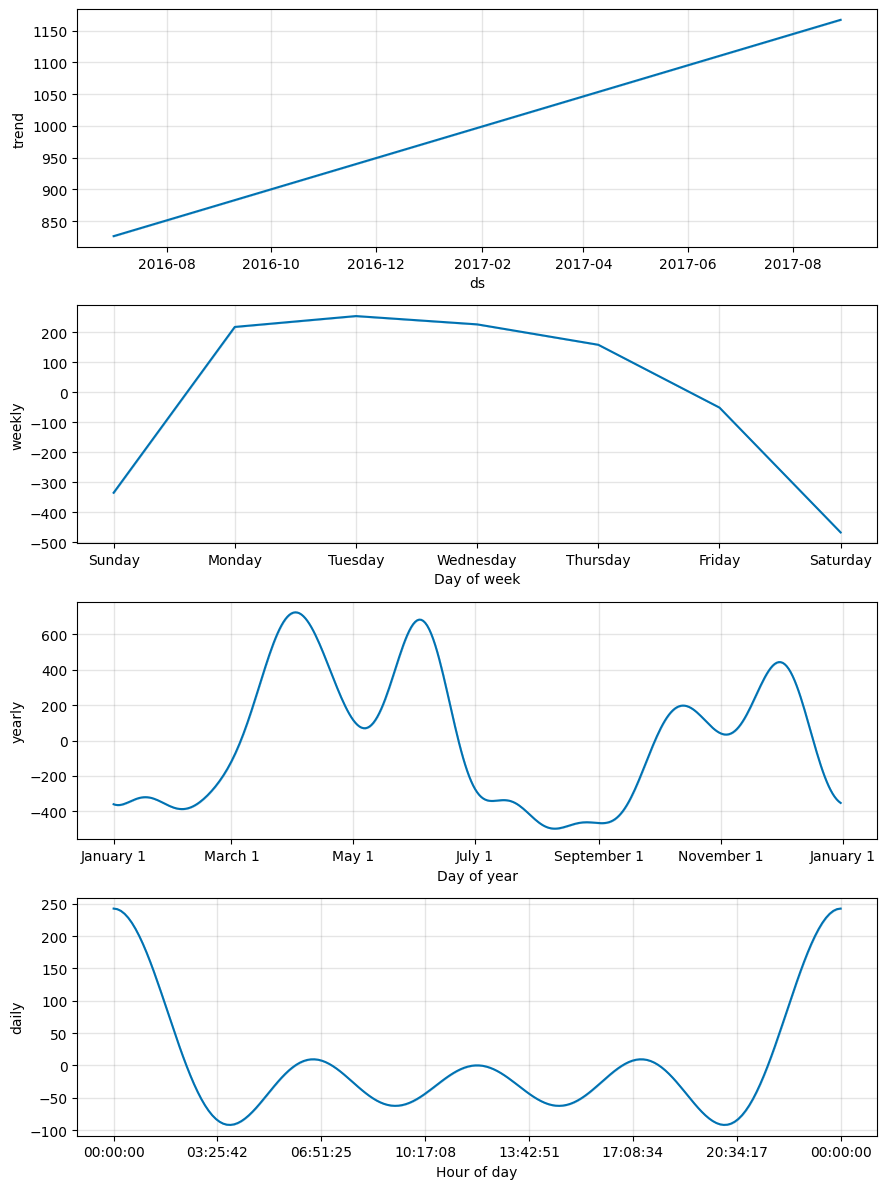

In [61]:
m.plot_components(forecast)